<a href="https://colab.research.google.com/github/AndrzejTM/matplotlib_1/blob/master/apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Price            Close
Ticker            AAPL
Date                  
2024-01-02  184.532089
2024-01-03  183.150391
2024-01-04  180.824341
2024-01-05  180.098694
2024-01-08  184.452560
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2806
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0269
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0179
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0194
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0092
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0088
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0079
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0071
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0060
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Przewidywana cena na kolejny dzień: 251.51625061035156


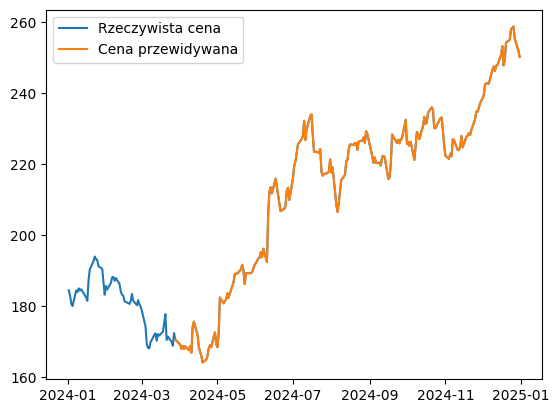

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Funkcja do pobrania danych z Yahoo Finance
def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data[['Close']]  # Wybieramy tylko kolumnę 'Close' (cenę zamknięcia)
    return data

# Pobieramy dane o cenach akcji z Yahoo Finance
ticker = 'AAPL'  # Ticker akcji, np. Apple (AAPL)
start_date = '2024-01-01'
end_date = '2025-01-01'
data = get_data(ticker, start_date, end_date)

# Wyświetl pierwsze 5 wierszy danych
print(data.head())

# Skalar do przekształcenia danych do zakresu [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values)

# Przygotowanie danych do modelu LSTM
X, y = [], []
for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])  # Przewidywanie na podstawie 60 ostatnich dni
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

# Kształtowanie danych wejściowych do LSTM (60 dni w historii)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Budowanie modelu LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Trenowanie modelu
model.fit(X, y, epochs=10, batch_size=32)

# Przewidywanie przyszłych wartości (np. na podstawie ostatnich 60 dni)
predicted_price = model.predict(X[-1].reshape(1, 60, 1))
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Przewidywana cena na kolejny dzień: {predicted_price[0][0]}")

# Opcjonalnie, wykres rzeczywistej ceny vs. przewidywanej ceny
plt.plot(data.index, data['Close'], label='Rzeczywista cena')
plt.plot(data.index[60:], scaler.inverse_transform(y.reshape(-1, 1)), label='Cena przewidywana')
plt.legend()
plt.show()
